In [940]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.stats
from collections import namedtuple

import importlib

import compare_rates
importlib.reload(compare_rates)

<module 'compare_rates' from '/Users/kelley/Projects/PhasingFamilies/parameter_estimation/compare_rates.py'>

In [233]:
chroms = [str(i) for i in range(1, 23)]

gens = ['0/0', '0/1', '1/1']
obss = ['0/0', '0/1', '1/1', './.']

# Population distributions

In [284]:
ihart_samples = compare_rates.pull_samples('../split_gen_ihart', chroms)
ihart32_samples = compare_rates.pull_samples('../split_gen_ihart3.2', chroms)

ssc_samples = compare_rates.pull_samples('../split_gen_ssc', chroms, dot_in_name=True)

spark_exome_samples = compare_rates.pull_samples('../split_gen_spark_exome', chroms)
spark_samples = compare_rates.pull_samples('../split_gen_spark', chroms)


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 3 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 3 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data


In [930]:
ihart_error_rates = compare_rates.pull_error_rates(ihart_samples, 'params/ihart_params.json', gens, obss)
ihart_LCR_error_rates = compare_rates.pull_error_rates(ihart_samples, 'params/ihart_LCR_params.json', gens, obss)
ihart_HCR_error_rates = compare_rates.pull_error_rates(ihart_samples, 'params/ihart_HCR_params.json', gens, obss)
ihart_EX_error_rates = compare_rates.pull_error_rates(ihart_samples, 'params/ihart_EX_params.json', gens, obss)
ihart32_error_rates = compare_rates.pull_error_rates(ihart32_samples, 'params/ihart3.2_params.json', gens, obss)

spark_exome_EX_error_rates = compare_rates.pull_error_rates(spark_exome_samples, 'params/spark_exome_EX_params.json', gens, obss)

spark_error_rates = compare_rates.pull_error_rates(spark_samples, 'params/spark_params.json', gens, obss)


In [949]:
ihart_chip_error_rates = compare_rates.pull_error_rates(ihart_samples, 'params/ihart_chip_params.json', gens, obss)


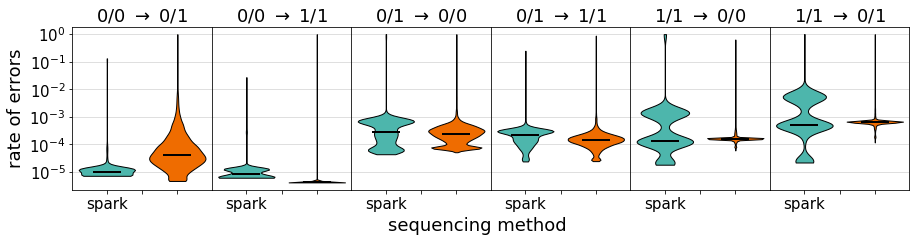

In [953]:

#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
#colors = ['#4db6ac', '#ef6c00', '#695d46', '#a1e8d9', '#ff9800', '#b3a77d', '#009668', '#ce93d8', '#cedd38']
colors = ['#4db6ac', '#ef6c00', '#ce93d8', '#695d46', '#009668', '#b3a77d', '#cedd38']

errors_of_interest = [('0/0', '0/1'), ('0/0', '1/1'),
                      ('0/1', '0/0'), ('0/1', '1/1'), 
                      ('1/1', '0/0'), ('1/1', '0/1'),
                      #('0/0', './.'), ('0/1', './.'), ('1/1', './.')
                            ]
fig, subs = plt.subplots(1, len(errors_of_interest), sharey=True, figsize=(15, 3))
fig.suptitle('sequencing method', y=0, fontsize=18)

for i, (g, o) in enumerate(errors_of_interest):
    g_index, o_index = gens.index(g), obss.index(o) 
    error_rates1 = -ihart_chip_error_rates[:, g_index, o_index]
    error_rates1 = error_rates1[ihart_samples.is_child & ~np.isnan(error_rates1)]
    
    error_rates3 = -spark_error_rates[:, g_index, o_index]
    error_rates3 = error_rates3[spark_samples.is_child & ~np.isnan(error_rates3)]
         
    parts = subs[i].violinplot([error_rates1, error_rates3],
               showmedians=True, showextrema=False, widths=0.8)
    
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    parts['cmedians'].set_edgecolor('black')
    parts['cmedians'].set_linewidth(2)
    
    if i == 0:
        subs[i].set_ylabel('rate of errors', fontsize=18)
        subs[i].set_yticklabels(['$10^{%0.0f}$' % f for f in subs[i].get_yticks()], {'fontsize': 15})
    else:
        subs[i].tick_params('y', length=0)
    subs[i].set_title(r'%s $\rightarrow$ %s' % (g, ' ./.  ' if o=='./.' else o), {'fontsize': 18})
    subs[i].set_xticklabels(['ihart', 'spark'], {'fontsize': 15})
    subs[i].grid(True, axis='y', alpha=0.5)
    subs[i].set_axisbelow(True)
fig.subplots_adjust(wspace=0.0)


#plt.tight_layout()
#plt.savefig('../plots/sequencing_method.png')
plt.show()

(array([ 785.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1373.]),
 array([162735. , 190984.7, 219234.4, 247484.1, 275733.8, 303983.5,
        332233.2, 360482.9, 388732.6, 416982.3, 445232. ]),
 <a list of 10 Patch objects>)

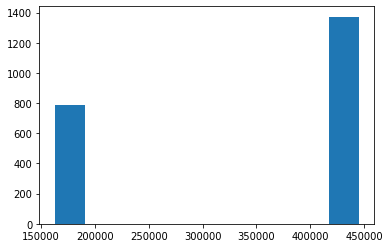

In [969]:
ihart_num_sites = compare_rates.pull_num_sites(ihart_samples, 'params/ihart_chip_params.json')
plt.hist(ihart_num_sites)

In [971]:
print(ihart_chip_error_rates[(ihart_num_sites>2000000), g_index, o_index])

[]


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [1012]:
suspects = set()
for i, (g, o) in enumerate(errors_of_interest):
    #print(g, o)
    g_index, o_index = gens.index(g), obss.index(o) 
    
    suspects.update([ihart_samples.sample_ids[i] for i in np.where((ihart_chip_error_rates[:, g_index, o_index] <= 1))[0]])
    suspects.update([spark_samples.sample_ids[i] for i in np.where((spark_error_rates[:, g_index, o_index] <= 1))[0]])
    suspects.update([spark_samples.sample_ids[i] for i in np.where((spark_error_rates[:, g_index, o_index] <= 1))[0]])
    
print(sorted(suspects))

['AU016202', 'AU035803', 'AU035811', 'AU045304', 'AU0866301', 'AU0897202', 'AU0897303', 'AU0905301', 'AU0923301', 'AU0941301', 'AU1043304_LCL', 'AU1308303_LCL', 'AU1495201', 'AU1495202', 'AU1495303', 'AU1860301_LCL', 'AU2410302_LCL', 'AU2911309_LCL', 'AU3051303_LCL', 'AU3053301_LCL', 'AU3154301_LCL', 'AU3646301_LCL', 'AU3702307_LCL', 'AU3713302_LCL', 'AU3761302_LCL', 'AU3846302_LCL', 'AU3913302_LCL', 'AU4235303_LCL']


In [1013]:
for i, (g, o) in enumerate(errors_of_interest):
    #print(g, o)
    g_index, o_index = gens.index(g), obss.index(o) 
    
    suspects.update([spark_samples.sample_ids[i] for i in np.where((spark_error_rates[:, g_index, o_index] <= 1))[0]])
    
print(sorted(suspects))

['SP0012827', 'SP0019964', 'SP0034232', 'SP0048794', 'SP0055475', 'SP0113386', 'SP0126796', 'SP0141546']


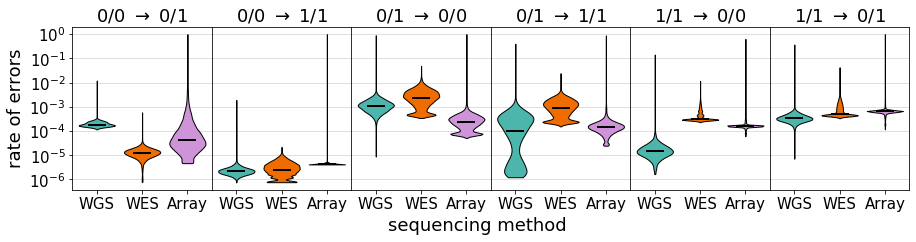

In [1014]:

#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
#colors = ['#4db6ac', '#ef6c00', '#695d46', '#a1e8d9', '#ff9800', '#b3a77d', '#009668', '#ce93d8', '#cedd38']
colors = ['#4db6ac', '#ef6c00', '#ce93d8', '#695d46', '#009668', '#b3a77d', '#cedd38']

errors_of_interest = [('0/0', '0/1'), ('0/0', '1/1'),
                      ('0/1', '0/0'), ('0/1', '1/1'), 
                      ('1/1', '0/0'), ('1/1', '0/1'),
                      #('0/0', './.'), ('0/1', './.'), ('1/1', './.')
                            ]
fig, subs = plt.subplots(1, len(errors_of_interest), sharey=True, figsize=(15, 3))
fig.suptitle('sequencing method', y=0, fontsize=18)

for i, (g, o) in enumerate(errors_of_interest):
    g_index, o_index = gens.index(g), obss.index(o) 
    error_rates1 = -ihart_error_rates[:, g_index, o_index]
    error_rates1 = error_rates1[ihart_samples.is_child & ~np.isnan(error_rates1)]
    
    error_rates2 = -spark_exome_EX_error_rates[:, g_index, o_index]
    error_rates2 = error_rates2[spark_exome_samples.is_child & ~np.isnan(error_rates2)]
    
    error_rates3 = -spark_error_rates[:, g_index, o_index]
    error_rates3 = error_rates3[spark_samples.is_child & ~np.isnan(error_rates3)]
         
    parts = subs[i].violinplot([error_rates1, error_rates2, error_rates3],
               showmedians=True, showextrema=False, widths=0.8)
    
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    parts['cmedians'].set_edgecolor('black')
    parts['cmedians'].set_linewidth(2)
    
    if i == 0:
        subs[i].set_ylabel('rate of errors', fontsize=18)
        subs[i].set_yticklabels(['$10^{%0.0f}$' % f for f in subs[i].get_yticks()], {'fontsize': 15})
    else:
        subs[i].tick_params('y', length=0)
    subs[i].set_title(r'%s $\rightarrow$ %s' % (g, ' ./.  ' if o=='./.' else o), {'fontsize': 18})
    subs[i].set_xticklabels(['', 'WGS', 'WES', 'Array'], {'fontsize': 15})
    subs[i].grid(True, axis='y', alpha=0.5)
    subs[i].set_axisbelow(True)
fig.subplots_adjust(wspace=0.0)


#plt.tight_layout()
#plt.savefig('../plots/sequencing_method.png')
plt.show()

In [237]:
def remove_nans(x):
    return x[~np.isnan(x)]

In [906]:
def plot_precision_recall(filename, prs, indices, gen, labels, colors, ylim=[0, 5], 
                          dotted=False, rotate_xlabels=False, legend_labels=None, legend_colors=None, ks_alternative='two-sided'):
    fig, subs = plt.subplots(1, 2, sharey=True, figsize=(8, 3))
    
    if gen == '1':  
        fig.suptitle('Heterozygous Sites', fontsize=15, horizontalalignment='left', y=0.87, x=0.13, )
    else:
        fig.suptitle('Homozygous Alternate Sites', fontsize=15, horizontalalignment='left', y=0.87, x=0.13)
    
    for k, attr in enumerate(['precision', 'recall']):
        upper_bound = [np.median(-np.log10(1-remove_nans(getattr(pr, attr + gen + '_upper_bound')[ind]))) for (pr, ind) in zip(prs, indices)]
        #lower_bound = [np.min(-np.log10(1-remove_nans(getattr(pr, attr)[ind]))) for (pr, ind) in zip(prs, indices)]
        lower_bound = [0]*len(prs)
        for j in range(len(prs)):
            subs[k].fill([j+0.7, j+0.7, j+1.3, j+1.3], [lower_bound[j], upper_bound[j], upper_bound[j], lower_bound[j]],
                            lw=0, c='lightgray', zorder=-10)

        data = [-np.log10(1-remove_nans(getattr(pr, attr + gen)[ind])) for (pr, ind) in zip(prs, indices)]
        print('n=', [d.shape[0] for d in data])
        parts = subs[k].violinplot(data, showmedians=True, showextrema=False, widths=0.8)


        if dotted:
            subs[k].plot(np.arange(1, 1+len(prs)), 
                            [np.median(-np.log10(1-remove_nans(getattr(prs[0], attr+gen)[indices[0]])))]*len(prs), 
                            color='black', linestyle='--')


        for pc, color in zip(parts['bodies'], colors):
            pc.set_facecolor(color)
            pc.set_edgecolor('black')
            pc.set_alpha(1)
        parts['cmedians'].set_edgecolor('black')
        parts['cmedians'].set_linewidth(2)

        if k == 0:
            subs[k].set_yticks(np.arange(1, ylim[1]))
            subs[k].set_yticklabels(['0.' + '9'*int(f) % f for f in subs[k].get_yticks()], {'fontsize': 15})
        else:
            subs[k].tick_params('y', length=0)
        subs[k].set_title(['Precision', 'Recall'][k], {'fontsize': 18})
        subs[k].set_xticks(np.arange(1, 1+len(prs)))
        subs[k].set_xticklabels(labels, {'fontsize': 12 if rotate_xlabels else 15})
        subs[k].grid(True, axis='y', color='darkgray')
        subs[k].set_axisbelow(True)
        subs[k].set_ylim(ylim)
        if rotate_xlabels:
            for tick in subs[k].get_xticklabels():
                tick.set_rotation(90)

        # legend
        if k == 1 and legend_labels is not None:
            entries = []
            for label, color in zip(legend_labels, legend_colors):
                entries.append(patches.Patch(color=color, label=label))
            subs[k].legend(handles=entries, loc='lower center', ncol=3,
                            bbox_to_anchor=(0, -0.3), borderaxespad=0., fontsize=15, frameon=False)

        print(attr, 
                [scipy.stats.ks_2samp(getattr(prs[0], attr + gen)[indices[0]], getattr(prs[i], attr + gen)[indices[i]], alternative=ks_alternative)[1] for i in range(1, len(labels))])

    fig.subplots_adjust(wspace=0.0, top=0.9, bottom=0.3 if rotate_xlabels else 0.2)
    #plt.show()
    plt.savefig(filename)

In [256]:
ihart_is_ok_sample = set()
with open('../data/170925.iHART.db.csv', 'r') as f:
    for line in f:
        pieces = line.strip().split(',')
        if pieces[0] == 'Passed_QC_analysis_ready':
            ihart_is_ok_sample.add(pieces[2])

In [257]:
ihart_precision_recall = compare_rates.pull_precision_recall(ihart_samples, 'params/ihart_params.json')
ihart_LCR_precision_recall = compare_rates.pull_precision_recall(ihart_samples, 'params/ihart_LCR_params.json')
ihart_HCR_precision_recall = compare_rates.pull_precision_recall(ihart_samples, 'params/ihart_HCR_params.json')
ihart_EX_precision_recall = compare_rates.pull_precision_recall(ihart_samples, 'params/ihart_EX_params.json')
ihart32_precision_recall = compare_rates.pull_precision_recall(ihart32_samples, 'params/ihart3.2_params.json')
ihart34_precision_recall = compare_rates.pull_precision_recall(ihart32_samples, 'params/ihart_params.json')

spark_exome_EX_precision_recall = compare_rates.pull_precision_recall(spark_exome_samples, 'params/spark_exome_EX_params.json')

spark_precision_recall = compare_rates.pull_precision_recall(spark_samples, 'params/spark_params.json')



In [285]:
ssc_precision_recall = compare_rates.pull_precision_recall(ssc_samples, 'params/ssc_params.json')
ssc_LCR_precision_recall = compare_rates.pull_precision_recall(ssc_samples, 'params/ssc_LCR_params.json')
ssc_HCR_precision_recall = compare_rates.pull_precision_recall(ssc_samples, 'params/ssc_HCR_params.json')
ssc_EX_precision_recall = compare_rates.pull_precision_recall(ssc_samples, 'params/ssc_EX_params.json')
ssc_GWAS_precision_recall = compare_rates.pull_precision_recall(ssc_samples, 'params/ssc_GWAS_params.json')


In [934]:
ihart_chip_precision_recall = compare_rates.pull_precision_recall(ihart_samples, 'params/ihart_chip_params.json')
ihart_chip_GWAS_precision_recall = compare_rates.pull_precision_recall(ihart_samples, 'params/ihart_chip_GWAS_params.json')


In [287]:
ihart_GWAS_precision_recall = compare_rates.pull_precision_recall(ihart_samples, 'params/ihart_GWAS_params.json')
spark_exome_GWAS_precision_recall = compare_rates.pull_precision_recall(spark_exome_samples, 'params/spark_exome_GWAS_params.json')
spark_GWAS_precision_recall = compare_rates.pull_precision_recall(spark_samples, 'params/spark_GWAS_params.json')


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater


n= [456, 756, 6729]
precision [1.887379141862766e-15, 2.7309788939209593e-232]
n= [456, 756, 6729]
recall [1.887379141862766e-15, 2.67729015873503e-295]


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in less
//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater


n= [456, 741, 6728]
precision [1.887379141862766e-15, 5.51691828717754e-298]
n= [456, 741, 6728]
recall [1.887379141862766e-15, 2.09779699399416e-61]


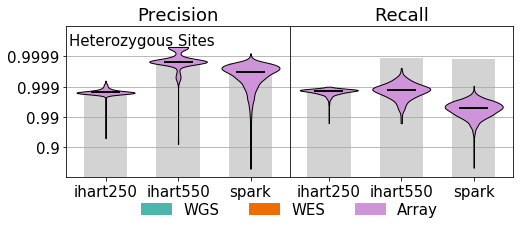

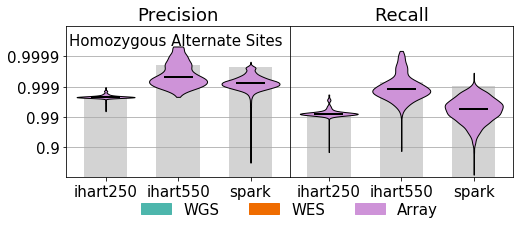

In [948]:
plot_precision_recall('../plots/chip_het.png',
                      [ihart_chip_precision_recall, ihart_chip_precision_recall, spark_precision_recall],
                      [(ihart_num_sites<200000) & ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]),
                       (ihart_num_sites>200000) & ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]),
                       spark_samples.is_child],
                      '1',
                      ['ihart250', 'ihart550', 'spark'],
                      ['#ce93d8', '#ce93d8', '#ce93d8'],
                      legend_labels=['WGS', 'WES', 'Array'], legend_colors=['#4db6ac', '#ef6c00', '#ce93d8'])
plot_precision_recall('../plots/chip_homalt.png',
                      [ihart_chip_precision_recall, ihart_chip_precision_recall, spark_precision_recall],
                      [(ihart_num_sites<200000) & ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]),
                       (ihart_num_sites>200000) & ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]),
                       spark_samples.is_child],
                      '2',
                      ['ihart250', 'ihart550', 'spark'],
                      ['#ce93d8', '#ce93d8', '#ce93d8'],
                      legend_labels=['WGS', 'WES', 'Array'], legend_colors=['#4db6ac', '#ef6c00', '#ce93d8'])

//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater


n= [2237, 1037, 9599, 756, 6729]
precision [2.8684933093963734e-47, 0.0, 0.0, 0.0]
n= [2237, 1037, 9599, 756, 6729]
recall [1.909724937840967e-37, 0.0, 1.9355187452774203e-09, 0.0]


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in greater


n= [2237, 1037, 9599, 741, 6728]
precision [1.917150252524099e-15, 0.0, 1.6653345369377348e-15, 0.0]
n= [2237, 1037, 9599, 741, 6728]
recall [8.879992566605306e-87, 0.0, 3.389971269435357e-112, 0.0]


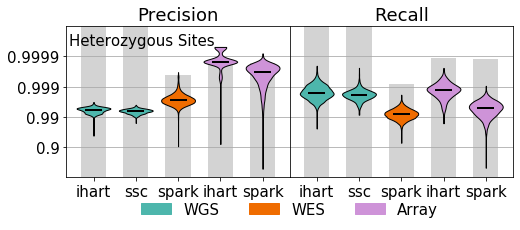

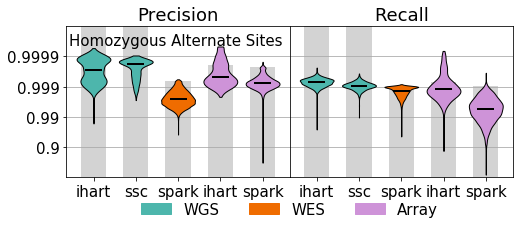

In [1015]:
plot_precision_recall('../plots/sequencing_method_het.eps',
                      [ihart_precision_recall, ssc_precision_recall, spark_exome_EX_precision_recall, ihart_chip_precision_recall, spark_precision_recall],
                      [ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]), 
                       ssc_samples.is_child, spark_exome_samples.is_child, 
                       (ihart_num_sites>200000) & ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]),
                       spark_samples.is_child],
                      '1',
                      ['ihart', 'ssc', 'spark', 'ihart', 'spark'],
                      ['#4db6ac', '#4db6ac', '#ef6c00', '#ce93d8', '#ce93d8'],
                      legend_labels=['WGS', 'WES', 'Array'], legend_colors=['#4db6ac', '#ef6c00', '#ce93d8'])
plot_precision_recall('../plots/sequencing_method_homalt.eps',
                      [ihart_precision_recall, ssc_precision_recall, spark_exome_EX_precision_recall, ihart_chip_precision_recall, spark_precision_recall],
                      [ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]), 
                       ssc_samples.is_child, spark_exome_samples.is_child, 
                       (ihart_num_sites>200000) & ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]),
                       spark_samples.is_child],
                      '2',
                      ['ihart', 'ssc', 'spark', 'ihart', 'spark'],
                      ['#4db6ac', '#4db6ac', '#ef6c00', '#ce93d8', '#ce93d8'],
                      legend_labels=['WGS', 'WES', 'Array'], legend_colors=['#4db6ac', '#ef6c00', '#ce93d8'])

n= [1172, 1169]
precision [4.955176902476802e-38]
n= [1172, 1169]
recall [7.583232358903426e-09]
n= [1172, 1169]
precision [0.0024952669788472145]
n= [1172, 1169]
recall [9.850111884002418e-21]


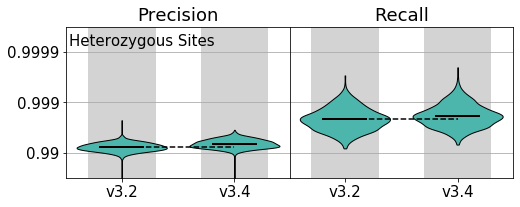

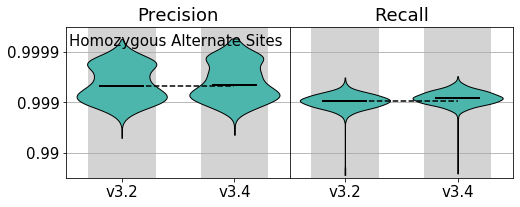

In [861]:
plot_precision_recall('../plots/gatk_old_het.eps',
                      [ihart32_precision_recall, ihart34_precision_recall],
                      [ihart32_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart32_samples.sample_ids]), 
                       ihart32_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart32_samples.sample_ids])],
                      '1',
                      ['v3.2', 'v3.4'],
                      ['#4db6ac', '#4db6ac'],
                     ylim=[1.5, 4.5],
                     dotted=True,
                     ks_alternative='greater')

plot_precision_recall('../plots/gatk_old_homalt.eps',
                      [ihart32_precision_recall, ihart34_precision_recall],
                      [ihart32_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart32_samples.sample_ids]), 
                       ihart32_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart32_samples.sample_ids])],
                      '2',
                      ['v3.2', 'v3.4'],
                      ['#4db6ac', '#4db6ac'],
                     ylim=[1.5, 4.5],
                     dotted=True,
                     ks_alternative='greater')

//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater


n= [2237, 1037, 756, 6729]
precision [1.3051304481592751e-10, 0.0, 1.0]
n= [2237, 1037, 756, 6729]
recall [4.183332236173953e-09, 4.523605966446465e-52, 0.0]
n= [2237, 1037, 741, 6728]


//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater


precision [2.0096443398287533e-09, 1.8348109045660854e-55, 1.0]
n= [2237, 1037, 741, 6728]
recall [1.3846845024700905e-05, 2.0884774246059045e-157, 0.0]


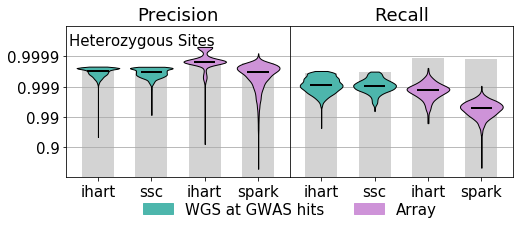

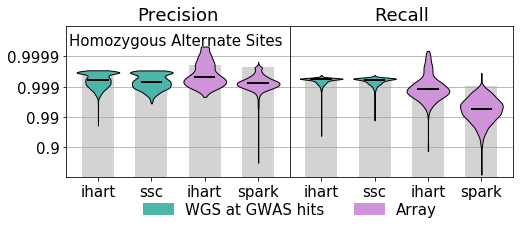

In [1017]:
plot_precision_recall('../plots/gwas_het.eps',
                      [ihart_GWAS_precision_recall, ssc_GWAS_precision_recall, ihart_chip_precision_recall, spark_precision_recall],
                      [ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]),
                      ssc_samples.is_child, 
                       (ihart_num_sites>200000) & ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]),
                       spark_samples.is_child],
                      '1',
                      ['ihart', 'ssc', 'ihart', 'spark'],
                      ['#4db6ac', '#4db6ac', '#ce93d8', '#ce93d8'],
                      legend_labels=['WGS at GWAS hits', 'Array'], legend_colors=['#4db6ac', '#ce93d8']
                     #ylim=[1.5, 4.5]
                     )

plot_precision_recall('../plots/gwas_homalt.eps',
                      [ihart_GWAS_precision_recall, ssc_GWAS_precision_recall, ihart_chip_precision_recall, spark_precision_recall],
                      [ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]),
                      ssc_samples.is_child, 
                       (ihart_num_sites>200000)  & ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]),
                       spark_samples.is_child],
                      '2',
                      ['ihart', 'ssc', 'ihart', 'spark'],
                      ['#4db6ac', '#4db6ac', '#ce93d8', '#ce93d8'],
                      legend_labels=['WGS at GWAS hits', 'Array'], legend_colors=['#4db6ac', '#ce93d8']
                     #ylim=[1.5, 4.5]
                     )

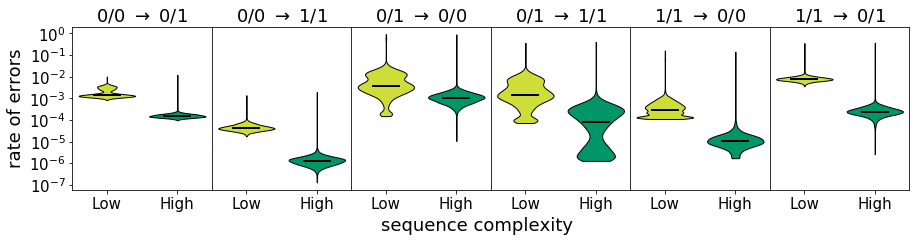

In [863]:

#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
#colors = ['#4db6ac', '#ef6c00', '#695d46', '#a1e8d9', '#ff9800', '#b3a77d', '#009668', '#ce93d8', '#cedd38']
colors = ['#cedd38', '#009668']

errors_of_interest = [('0/0', '0/1'), ('0/0', '1/1'),
                      ('0/1', '0/0'), ('0/1', '1/1'), 
                      ('1/1', '0/0'), ('1/1', '0/1'),
                      #('0/0', './.'), ('0/1', './.'), ('1/1', './.')
                            ]
fig, subs = plt.subplots(1, len(errors_of_interest), sharey=True, figsize=(15, 3))
fig.suptitle('sequence complexity', y=0, fontsize=18)

for i, (g, o) in enumerate(errors_of_interest):
    g_index, o_index = gens.index(g), obss.index(o) 
    error_rates1 = -ihart_LCR_error_rates[:, g_index, o_index]
    error_rates1 = error_rates1[ihart_samples.is_child & ~np.isnan(error_rates1)]
    
    error_rates4 = -ihart_HCR_error_rates[:, g_index, o_index]
    error_rates4 = error_rates4[ihart_samples.is_child & ~np.isnan(error_rates4)]
         
    parts = subs[i].violinplot([error_rates1, error_rates4],
               showmedians=True, showextrema=False, widths=0.8)
    
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    parts['cmedians'].set_edgecolor('black')
    parts['cmedians'].set_linewidth(2)
    
    if i == 0:
        subs[i].set_ylabel('rate of errors', fontsize=18)
        subs[i].set_yticks(np.arange(-7, 1))
        subs[i].set_yticklabels(['$10^{%0.0f}$' % f for f in subs[i].get_yticks()], {'fontsize': 15})
    else:
        subs[i].tick_params('y', length=0)
    subs[i].set_title(r'%s $\rightarrow$ %s' % (g, ' ./.  ' if o=='./.' else o), {'fontsize': 18})
    subs[i].set_xticks(np.arange(1, 3))
    subs[i].set_xticklabels(['Low', 'High'], {'fontsize': 15})

fig.subplots_adjust(wspace=0.0)
#plt.savefig('../plots/lcr.png')
plt.show()

n= [2237, 1037, 2237, 1037]
precision [2.70786924306232e-151, 0.0, 0.0]
n= [2237, 1037, 2237, 1037]
recall [1.9234620734757154e-32, 0.0, 0.0]
n= [2237, 1037, 2237, 1037]
precision [6.54966717357319e-39, 0.0, 0.0]
n= [2237, 1037, 2237, 1037]
recall [1.676296107023255e-146, 0.0, 0.0]


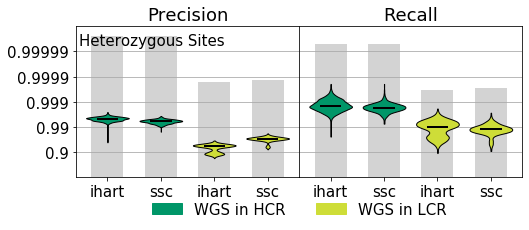

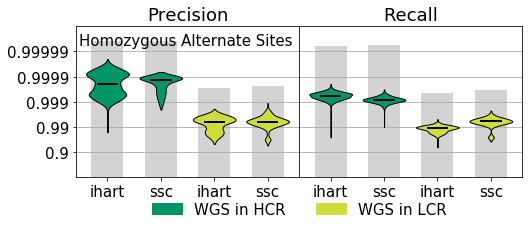

In [886]:
plot_precision_recall('../plots/lcr_het.eps',
                      [ihart_HCR_precision_recall, ssc_HCR_precision_recall, ihart_LCR_precision_recall, ssc_LCR_precision_recall],
                      [ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]), 
                       ssc_samples.is_child,
                       ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]),
                       ssc_samples.is_child],
                      '1',
                      ['ihart', 'ssc', 'ihart', 'ssc'],
                      ['#009668', '#009668', '#cedd38', '#cedd38'],
                      legend_labels=['WGS in HCR', 'WGS in LCR'], legend_colors=['#009668', '#cedd38'],
                      ylim=[0, 6])

plot_precision_recall('../plots/lcr_homalt.eps',
                      [ihart_HCR_precision_recall, ssc_HCR_precision_recall, ihart_LCR_precision_recall, ssc_LCR_precision_recall],
                      [ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]), 
                       ssc_samples.is_child,
                       ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]),
                       ssc_samples.is_child],
                      '2',
                      ['ihart', 'ssc', 'ihart', 'ssc'],
                      ['#009668', '#009668', '#cedd38', '#cedd38'],
                      legend_labels=['WGS in HCR', 'WGS in LCR'], legend_colors=['#009668', '#cedd38'],
                     ylim=[0, 6])




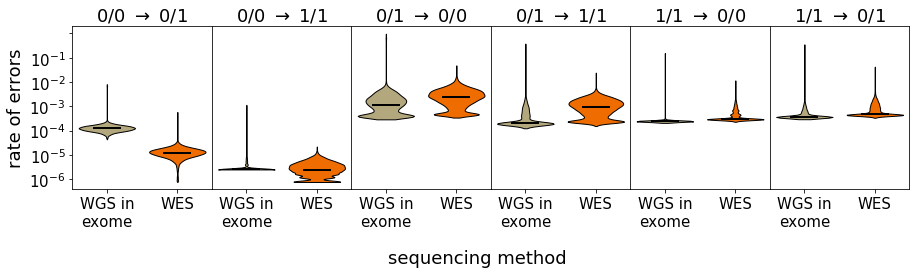

In [865]:

#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
#colors = ['#4db6ac', '#ef6c00', '#695d46', '#a1e8d9', '#ff9800', '#b3a77d', '#009668', '#ce93d8', '#cedd38']
colors = ['#b3a77d', '#ef6c00']

errors_of_interest = [('0/0', '0/1'), ('0/0', '1/1'),
                      ('0/1', '0/0'), ('0/1', '1/1'), 
                      ('1/1', '0/0'), ('1/1', '0/1'),
                      #('0/0', './.'), ('0/1', './.'), ('1/1', './.')
                            ]
fig, subs = plt.subplots(1, len(errors_of_interest), sharey=True, figsize=(15, 3))
fig.suptitle('sequencing method', y=-0.15, fontsize=18)

for i, (g, o) in enumerate(errors_of_interest):
    g_index, o_index = gens.index(g), obss.index(o) 
    error_rates1 = -ihart_EX_error_rates[:, g_index, o_index]
    indices1 = ihart_samples.is_child & ~np.isnan(error_rates1)
    error_rates1 = error_rates1
    
    error_rates2 = -spark_exome_EX_error_rates[:, g_index, o_index]
    indices2 = spark_exome_samples.is_child & ~np.isnan(error_rates2)
    error_rates2 = error_rates2
    
    #print(np.nanmedian(error_counts1[indices1])-np.nanmedian(error_counts2[indices2]))
    parts = subs[i].violinplot([error_rates1[indices1], error_rates2[indices2]],
               showmedians=True, showextrema=False, widths=0.8)
    
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    parts['cmedians'].set_edgecolor('black')
    parts['cmedians'].set_linewidth(2)
    
    if i == 0:
        subs[i].set_ylabel('rate of errors', fontsize=18)
        #subs[i].set_yticks(np.arange(-7, 1))
        subs[i].set_yticklabels(['$10^{%0.0f}$' % f for f in subs[i].get_yticks()], {'fontsize': 15})
    else:
        subs[i].tick_params('y', length=0)
    subs[i].set_title(r'%s $\rightarrow$ %s' % (g, ' ./.  ' if o=='./.' else o), {'fontsize': 18})
    subs[i].set_xticks(np.arange(1, 3))
    subs[i].set_xticklabels(['WGS in\nexome', 'WES'], {'fontsize': 15})


fig.subplots_adjust(wspace=0.0)


#plt.tight_layout()
#plt.savefig('../plots/wgs_vs_wes.png')
plt.show()

n= [2237, 1037, 9599]
precision [2.489890004412341e-91, 0.0]
n= [2237, 1037, 9599]
recall [1.1545395779888123e-22, 0.0]
n= [2237, 1037, 9599]
precision [1.1404592581291264e-17, 0.0]
n= [2237, 1037, 9599]
recall [2.0496228603228417e-08, 1.0]


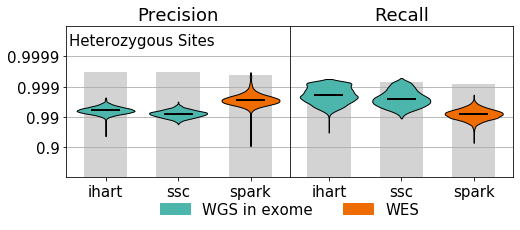

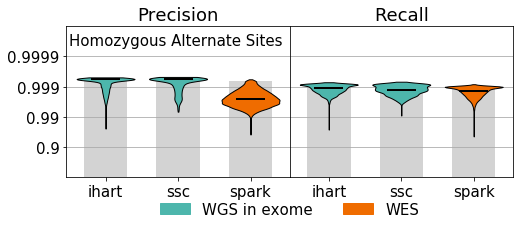

In [866]:
plot_precision_recall('../plots/wes_het.eps',
                      [ihart_EX_precision_recall, ssc_EX_precision_recall, spark_exome_EX_precision_recall],
                      [ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]), 
                       ssc_samples.is_child, spark_exome_samples.is_child],
                      '1',
                      ['ihart', 'ssc', 'spark'],
                      ['#4db6ac', '#4db6ac', '#ef6c00'],
                      legend_labels=['WGS in exome', 'WES'], legend_colors=['#4db6ac', '#ef6c00'])

plot_precision_recall('../plots/wes_homalt.eps',
                      [ihart_EX_precision_recall, ssc_EX_precision_recall, spark_exome_EX_precision_recall],
                      [ihart_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]), 
                       ssc_samples.is_child, spark_exome_samples.is_child],
                      '2',
                      ['ihart', 'ssc', 'spark'],
                      ['#4db6ac', '#4db6ac', '#ef6c00'],
                      legend_labels=['WGS in exome', 'WES'], legend_colors=['#4db6ac', '#ef6c00'])


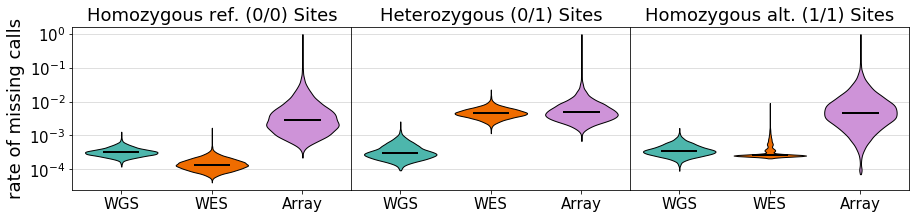

In [867]:

#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
#colors = ['#4db6ac', '#ef6c00', '#695d46', '#a1e8d9', '#ff9800', '#b3a77d', '#009668', '#ce93d8', '#cedd38']
colors = ['#4db6ac', '#ef6c00', '#ce93d8', '#695d46', '#009668', '#b3a77d', '#cedd38']

errors_of_interest = [('0/0', './.'), ('0/1', './.'), ('1/1', './.')
                            ]
fig, subs = plt.subplots(1, len(errors_of_interest), sharey=True, figsize=(15, 3))

for i, (g, o) in enumerate(errors_of_interest):
    g_index, o_index = gens.index(g), obss.index(o) 
    error_rates1 = -ihart_error_rates[:, g_index, o_index]
    error_rates1 = error_rates1[ihart_samples.is_child & ~np.isnan(error_rates1)]
    
    error_rates2 = -spark_exome_EX_error_rates[:, g_index, o_index]
    error_rates2 = error_rates2[spark_exome_samples.is_child & ~np.isnan(error_rates2)]
    
    error_rates3 = -spark_error_rates[:, g_index, o_index]
    error_rates3 = error_rates3[spark_samples.is_child & ~np.isnan(error_rates3)]
     
    parts = subs[i].violinplot([error_rates1, error_rates2, error_rates3],
               showmedians=True, showextrema=False, widths=0.8)
    
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    parts['cmedians'].set_edgecolor('black')
    parts['cmedians'].set_linewidth(2)
    
    if i == 0:
        subs[i].set_ylabel('rate of missing calls', fontsize=18)
        subs[i].set_yticklabels(['$10^{%0.0f}$' % f for f in subs[i].get_yticks()], {'fontsize': 15})
    else:
        subs[i].tick_params('y', length=0)
    subs[i].set_title(['Homozygous ref. (0/0) Sites', 'Heterozygous (0/1) Sites', 'Homozygous alt. (1/1) Sites'][i], {'fontsize': 18})
    subs[i].set_xticks(np.arange(1, 4))
    subs[i].set_xticklabels(['WGS', 'WES', 'Array'], {'fontsize': 15})
    subs[i].grid(True, axis='y', alpha=0.5)
    subs[i].set_axisbelow(True)
    
fig.subplots_adjust(wspace=0.0)
plt.savefig('../plots/missing_calls.png')
#plt.show()

# Exome distance from target

In [868]:
all_samples = [spark_exome_samples]
all_error_rates = [spark_exome_EX_error_rates]
all_precision_recall = [spark_exome_EX_precision_recall]
for w in [25, 50, 75, 1000]:
    samples = compare_rates.pull_samples('../split_gen_spark_exome_EX%d' % w, chroms)
    all_samples.append(samples)

    error_rates = compare_rates.pull_error_rates(samples, 'params/spark_exome_EX%d_params.json' % w, gens, obss)
    all_error_rates.append(error_rates)
    
    precision_recall = compare_rates.pull_precision_recall(samples, 'params/spark_exome_EX%d_params.json' % w)
    all_precision_recall.append(precision_recall)
    
    
    


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data


['1.00', '1.07', '1.33', '1.76', '1.95']
['1.00', '1.13', '1.11', '1.21', '1.07']
['1.00', '0.94', '1.76', '3.29', '3.88']
['1.00', '1.16', '2.59', '5.74', '7.33']
['1.00', '2.39', '2.19', '2.50', '3.05']
['1.00', '2.69', '6.11', '15.39', '17.21']


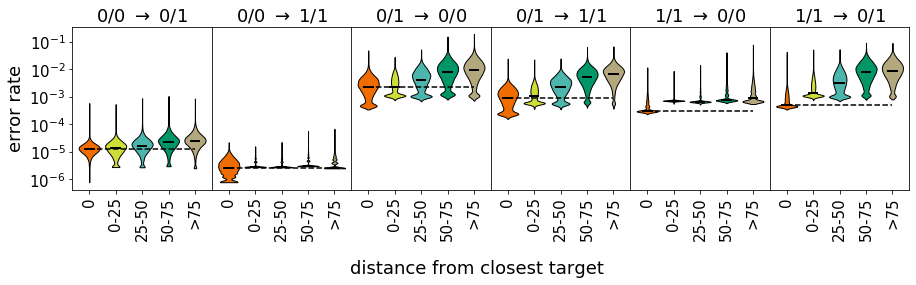

In [869]:

#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']
#colors = ['#4db6ac', '#ef6c00', '#695d46', '#a1e8d9', '#ff9800', '#b3a77d', '#009668', '#ce93d8', '#cedd38']
colors = ['#ef6c00', '#cedd38', '#4db6ac', '#009668', '#b3a77d', ]

errors_of_interest = [('0/0', '0/1'), ('0/0', '1/1'),
                      ('0/1', '0/0'), ('0/1', '1/1'), 
                      ('1/1', '0/0'), ('1/1', '0/1'),
                    #('0/1', './.'), ('1/1', './.')
                            ]
fig, subs = plt.subplots(1, len(errors_of_interest), sharey=True, figsize=(15, 3))
fig.suptitle('distance from closest target', y=-0.2, fontsize=18)



for i, (g, o) in enumerate(errors_of_interest):
    g_index, o_index = gens.index(g), obss.index(o) 
    
    to_plot = []
    for samples, error_rates in zip(all_samples, all_error_rates):
        add_plot = -error_rates[samples.is_child, g_index, o_index]
        add_plot = add_plot[~np.isnan(add_plot)]
        to_plot.append(add_plot)
             
    parts = subs[i].violinplot(to_plot,
               showmedians=True, showextrema=False, widths=0.8)
    
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    parts['cmedians'].set_edgecolor('black')
    parts['cmedians'].set_linewidth(2)
        
    #subs[i].plot(range(1, 5), [np.median(x) for x in to_plot], color='black')
    subs[i].plot(range(1, 6), [np.median(to_plot[0])]*5, color='black', linestyle='--')
    print(['%0.2f' % 10.0**(np.median(x)-np.median(to_plot[0])) for x in to_plot])
    
    if i == 0:
        subs[i].set_ylabel('error rate', fontsize=18)
        #subs[i].set_ylim([-7, 1])
        subs[i].set_yticks(np.arange(-6, 1))
        subs[i].set_yticklabels(['$10^{%0.0f}$' % f for f in subs[i].get_yticks()], {'fontsize': 15})
    else:
        subs[i].tick_params('y', length=0)
    subs[i].set_title(r'%s $\rightarrow$ %s' % (g, ' ./.  ' if o=='./.' else o), {'fontsize': 18})
    subs[i].set_xticks(np.arange(1, 6))
    subs[i].set_xticklabels(['0', '0-25', '25-50', '50-75', '>75'], {'fontsize': 15})
    for tick in subs[i].get_xticklabels():
        tick.set_rotation(90)

fig.subplots_adjust(wspace=0.0)


#plt.tight_layout()
#plt.savefig(filename)
plt.show()

n= [9599, 9595, 9599, 9593, 9599]
precision [2.456142136947711e-70, 0.0, 0.0, 0.0]
n= [9599, 9595, 9599, 9593, 9599]
recall [1.3897366304794719e-136, 0.0, 0.0, 0.0]
n= [9599, 9595, 9599, 9593, 9599]
precision [7.406982676136896e-163, 0.0, 0.0, 0.0]
n= [9599, 9595, 9599, 9593, 9599]
recall [0.0, 0.0, 0.0, 0.0]


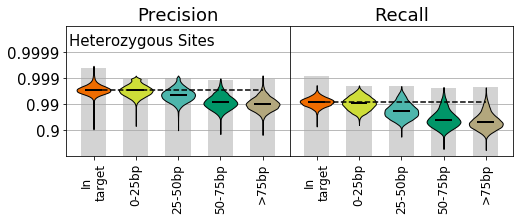

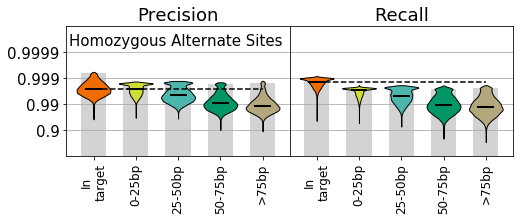

In [870]:
plot_precision_recall('../plots/wes_target_het.eps',
                      all_precision_recall,
                      [samples.is_child for samples in all_samples],
                      '1',
                      ['In\ntarget', '0-25bp', '25-50bp', '50-75bp', '>75bp'],
                      ['#ef6c00', '#cedd38', '#4db6ac', '#009668', '#b3a77d', ],
                     dotted=True,
                     rotate_xlabels=True, ks_alternative='less')
plot_precision_recall('../plots/wes_target_homalt.eps',
                      all_precision_recall,
                      [samples.is_child for samples in all_samples],
                      '2',
                      ['In\ntarget', '0-25bp', '25-50bp', '50-75bp', '>75bp'],
                      ['#ef6c00', '#cedd38', '#4db6ac', '#009668', '#b3a77d', ],
                     dotted=True,
                     rotate_xlabels=True, ks_alternative='less')


In [871]:
# LCL vs WB

In [872]:
is_lcl = np.zeros((len(ihart_samples.sample_ids),), dtype=bool)
is_wb = np.zeros((len(ihart_samples.sample_ids),), dtype=bool)

with open('../data/170925.iHART.db.csv', 'r') as f:
    for line in f:
        pieces = line.strip().split(',')
        if pieces[2] in ihart_samples.sample_ids and len(pieces)>25:
            if pieces[25] == 'LCL':
                is_lcl[ihart_samples.sample_ids.index(pieces[2])] = True
            elif pieces[25] == 'WB':
                is_wb[ihart_samples.sample_ids.index(pieces[2])] = True
print('LCL', np.sum(is_lcl), 'WB', np.sum(is_wb))

LCL 3562 WB 489


n= [274, 1963]
precision [8.277449353499833e-06]
n= [274, 1963]
recall [0.013444092370678118]
n= [274, 1963]
precision [0.035575562229711366]
n= [274, 1963]
recall [0.16238520385536093]


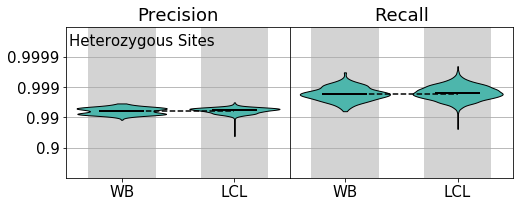

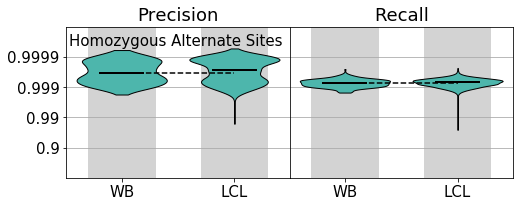

In [873]:
plot_precision_recall('../plots/lcl_wb_het.eps',
                      [ihart_precision_recall, ihart_precision_recall],
                      [ihart_samples.is_child & is_wb & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]), 
                       ihart_samples.is_child & is_lcl & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids])],
                      '1',
                      ['WB', 'LCL'],
                      ['#4db6ac', '#4db6ac'],
                     dotted=True)

plot_precision_recall('../plots/lcl_wb_homalt.eps',
                      [ihart_precision_recall, ihart_precision_recall],
                      [ihart_samples.is_child & is_wb & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids]), 
                       ihart_samples.is_child & is_lcl & np.array([x in ihart_is_ok_sample for x in ihart_samples.sample_ids])],
                      '2',
                      ['WB', 'LCL'],
                      ['#4db6ac', '#4db6ac'],
                     dotted=True)

1.172692878832435 1.1743845688247188
1.0944899076979937 1.1566783889327377


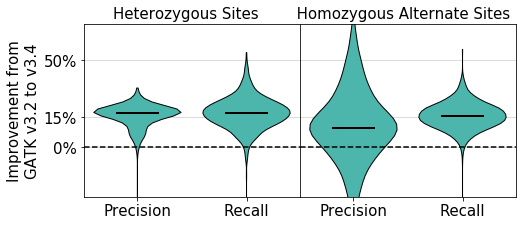

In [874]:
indices = ihart32_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart32_samples.sample_ids])

precision1_delta = -np.log10(1-ihart34_precision_recall.precision1[indices]) + np.log10(1-ihart32_precision_recall.precision1[indices])
precision2_delta = -np.log10(1-ihart34_precision_recall.precision2[indices]) + np.log10(1-ihart32_precision_recall.precision2[indices]) 
recall1_delta = -np.log10(1-ihart34_precision_recall.recall1[indices]) + np.log10(1-ihart32_precision_recall.recall1[indices])
recall2_delta = -np.log10(1-ihart34_precision_recall.recall2[indices]) + np.log10(1-ihart32_precision_recall.recall2[indices]) 

print(10.0**np.nanmedian(precision1_delta), 10.0**np.nanmedian(recall1_delta))
print(10.0**np.nanmedian(precision2_delta), 10.0**np.nanmedian(recall2_delta))

ticks = np.log10([1, 1.15, 1.5])
labels = ['0%', '15%', '50%']


fig = plt.figure(figsize=(8, 3))
fig.suptitle('Heterozygous Sites        Homozygous Alternate Sites', 
             fontsize=15, horizontalalignment='left', x=0.2)

ax = plt.subplot(1, 2, 1)
parts = plt.violinplot([remove_nans(precision1_delta), remove_nans(recall1_delta)], 
                                   showmedians=True, showextrema=False, widths=0.8)
        
        
for pc in parts['bodies']:
    pc.set_facecolor('#4db6ac')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
parts['cmedians'].set_edgecolor('black')
parts['cmedians'].set_linewidth(2)

plt.axhline(0, color='black', linestyle='--')

plt.grid(True, axis='y', color='lightgray')
ax.set_axisbelow(True)

plt.ylim([-0.1, 0.25])
plt.yticks(ticks, labels, fontsize=15)
plt.ylabel('Improvement from\nGATK v3.2 to v3.4', fontsize=15)

plt.xticks(range(1, 3), ['Precision', 'Recall'], fontsize=15)

ax2 = plt.subplot(1, 2, 2, sharey=ax)
parts = plt.violinplot([remove_nans(precision2_delta), remove_nans(recall2_delta)], 
                                   showmedians=True, showextrema=False, widths=0.8)
        
        
for pc in parts['bodies']:
    pc.set_facecolor('#4db6ac')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
parts['cmedians'].set_edgecolor('black')
parts['cmedians'].set_linewidth(2)

plt.axhline(0, color='black', linestyle='--')

plt.grid(True, axis='y', color='lightgray')
ax2.set_axisbelow(True)

plt.tick_params('y', length=0)
plt.xticks(range(1, 3), ['Precision', 'Recall'], fontsize=15)
plt.setp(ax2.get_yticklabels(), visible=False)
fig.subplots_adjust(wspace=0.0, top=0.9, bottom=0.1)

plt.xticks(range(1, 3), ['Precision', 'Recall'], fontsize=15)

fig.subplots_adjust(wspace=0.0, top=0.9, bottom=0.1, left=0.15)

plt.savefig('../plots/gatk.eps')

In [875]:
id_map = dict()
with open('../data/ssc.id_map.from.repository', 'r') as f:
    for line in f:
        pieces = line.strip().split('\t')
        id_map[pieces[1]] = pieces[0]

In [891]:
precision_recall_hg38 = np.zeros((len(ssc_samples.sample_ids), 4))
precision_recall_hg38[:] = np.nan

for x in [1, 2, 3, 4, 5, 7]:
    ssc_phase1_samples = compare_rates.pull_samples('../split_gen_ssc_phase1/split_gen_ssc_phase1_%d' % x, chroms)
    ssc_phase1_pr = compare_rates.pull_precision_recall(ssc_phase1_samples, 'params/ssc_phase1_%d_params.json' % x)
    for i, sample_id in enumerate(ssc_samples.sample_ids):
        if sample_id in id_map and id_map[sample_id] in ssc_phase1_samples.sample_ids:
            j = ssc_phase1_samples.sample_ids.index(id_map[sample_id])
            precision_recall_hg38[i, 0] = ssc_phase1_pr.precision1[j]
            precision_recall_hg38[i, 1] = ssc_phase1_pr.precision2[j]
            precision_recall_hg38[i, 2] = ssc_phase1_pr.recall1[j]
            precision_recall_hg38[i, 3] = ssc_phase1_pr.recall2[j]

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
Removing 0 individuals involved in multiple generations
Removing 0 individuals missing chromosomal data


1.3129976806095969 0.9906871367740461
0.5996168455370766 1.176606834667582


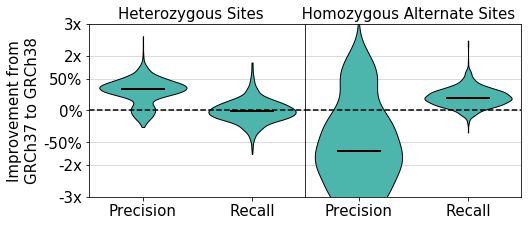

In [892]:
indices = ssc_samples.is_child

precision1_delta = -np.log10(1-precision_recall_hg38[indices, 0]) + np.log10(1-ssc_precision_recall.precision1[indices])
precision2_delta = -np.log10(1-precision_recall_hg38[indices, 1]) + np.log10(1-ssc_precision_recall.precision2[indices]) 
recall1_delta = -np.log10(1-precision_recall_hg38[indices, 2]) + np.log10(1-ssc_precision_recall.recall1[indices])
recall2_delta = -np.log10(1-precision_recall_hg38[indices, 3]) + np.log10(1-ssc_precision_recall.recall2[indices]) 

ticks = np.log10([1/3, 1/2, 1/1.5, 1, 1.5, 2.0, 3.0])
labels = ['-3x', '-2x', '-50%', '0%', '50%', '2x', '3x']

print(10.0**np.nanmedian(precision1_delta), 10.0**np.nanmedian(recall1_delta))
print(10.0**np.nanmedian(precision2_delta), 10.0**np.nanmedian(recall2_delta))

fig = plt.figure(figsize=(8, 3))
fig.suptitle('Heterozygous Sites        Homozygous Alternate Sites', 
             fontsize=15, horizontalalignment='left', x=0.2)

ax = plt.subplot(1, 2, 1)
parts = plt.violinplot([remove_nans(precision1_delta), remove_nans(recall1_delta)], 
                                   showmedians=True, showextrema=False, widths=0.8)
        
        
for pc in parts['bodies']:
    pc.set_facecolor('#4db6ac')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
parts['cmedians'].set_edgecolor('black')
parts['cmedians'].set_linewidth(2)

plt.axhline(0, color='black', linestyle='--')

plt.ylim([-0.1, 0.25])
plt.yticks(ticks, labels, fontsize=15)
plt.grid(True, axis='y', color='lightgray')
ax.set_axisbelow(True)
plt.ylabel('Improvement from\nGRCh37 to GRCh38', fontsize=15)

plt.xticks(range(1, 3), ['Precision', 'Recall'], fontsize=15)

ax2 = plt.subplot(1, 2, 2, sharey=ax)

parts = plt.violinplot([remove_nans(precision2_delta), remove_nans(recall2_delta)], 
                                   showmedians=True, showextrema=False, widths=0.8)
        
        
for pc in parts['bodies']:
    pc.set_facecolor('#4db6ac')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
parts['cmedians'].set_edgecolor('black')
parts['cmedians'].set_linewidth(2)

plt.axhline(0, color='black', linestyle='--')

plt.grid(True, axis='y', color='lightgray')
ax2.set_axisbelow(True)

plt.ylim([np.log10(1/3), np.log10(3)])
plt.tick_params('y', length=0)
plt.xticks(range(1, 3), ['Precision', 'Recall'], fontsize=15)
plt.setp(ax2.get_yticklabels(), visible=False)
fig.subplots_adjust(wspace=0.0, top=0.9, bottom=0.1, left=0.15)

plt.savefig('../plots/reference.eps')

In [928]:
def plot_precision_recall_delta(filename, prs, indices, gen, labels, colors, ylim=[0, 5], 
                          rotate_xlabels=False, legend_labels=None, legend_colors=None, ks_alternative='two-sided'):
    fig, subs = plt.subplots(1, 2, sharey=True, figsize=(8, 3))
    
    if gen == '1':  
        fig.suptitle('Heterozygous Sites', fontsize=15, horizontalalignment='left', y=0.87, x=0.13, )
    else:
        fig.suptitle('Homozygous Alternate Sites', fontsize=15, horizontalalignment='left', y=0.87, x=0.13)
    
    for k, attr in enumerate(['precision', 'recall']):
        
        data = [remove_nans(getattr(pr, attr + gen)[ind]) for (pr, ind) in zip(prs, indices)]
        print('n=', [d.shape[0] for d in data])
        parts = subs[k].violinplot(data, showmedians=True, showextrema=False, widths=0.8)


        for pc, color in zip(parts['bodies'], colors):
            pc.set_facecolor(color)
            pc.set_edgecolor('black')
            pc.set_alpha(1)
        parts['cmedians'].set_edgecolor('black')
        parts['cmedians'].set_linewidth(2)

        subs[k].axhline(0, color='black', linestyle='--')

        if k == 0:
            subs[k].set_yticks(np.log10([1/1.5, 1, 1.15, 1.5, 2.0, 3.0]))
            subs[k].set_yticklabels(['-50%', '0%', '15%', '50%', '2x', '3x'], {'fontsize': 15})
        else:
            subs[k].tick_params('y', length=0)
        subs[k].set_title(['Precision', 'Recall'][k], {'fontsize': 18})
        subs[k].set_xticks(np.arange(1, 1+len(prs)))
        subs[k].set_xticklabels(labels, {'fontsize': 12 if rotate_xlabels else 15})
        subs[k].grid(True, axis='y', color='darkgray')
        subs[k].set_axisbelow(True)
        subs[k].set_ylim(ylim)
        if rotate_xlabels:
            for tick in subs[k].get_xticklabels():
                tick.set_rotation(90)

        # legend
        if k == 1 and legend_labels is not None:
            entries = []
            for label, color in zip(legend_labels, legend_colors):
                entries.append(patches.Patch(color=color, label=label))
            subs[k].legend(handles=entries, loc='lower center', ncol=3,
                            bbox_to_anchor=(0, -0.3), borderaxespad=0., fontsize=15, frameon=False)

        print(attr, 
                [scipy.stats.ks_2samp(getattr(prs[0], attr + gen)[indices[0]], getattr(prs[i], attr + gen)[indices[i]], alternative=ks_alternative)[1] for i in range(1, len(labels))])

    fig.subplots_adjust(wspace=0.0, top=0.9, bottom=0.3 if rotate_xlabels else 0.2)
    #plt.show()
    plt.savefig(filename)

n= [1169, 957]
precision [2.220446049250313e-16]
n= [1169, 957]
recall [2.220446049250313e-16]
n= [1169, 957]
precision [2.220446049250313e-16]
n= [1169, 957]
recall [2.220446049250313e-16]


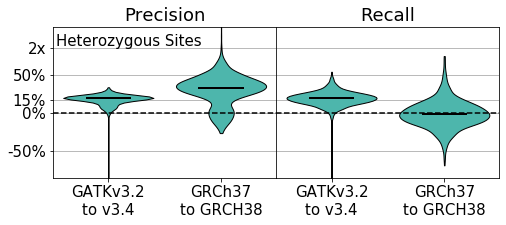

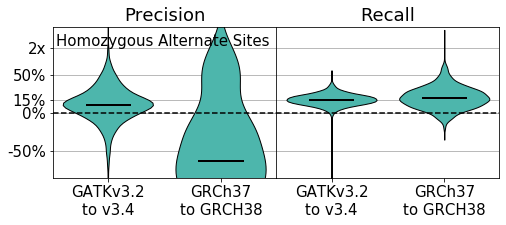

In [929]:
PrecisionRecallDelta = namedtuple('PrecisionRecall', ['precision1', 'recall1', 'precision2', 'recall2',
                    'precision1_upper_bound', 'recall1_upper_bound', 'precision2_upper_bound', 'recall2_upper_bound'])

precision1_delta = -np.log10(1-ihart34_precision_recall.precision1) + np.log10(1-ihart32_precision_recall.precision1)
precision2_delta = -np.log10(1-ihart34_precision_recall.precision2) + np.log10(1-ihart32_precision_recall.precision2) 
recall1_delta = -np.log10(1-ihart34_precision_recall.recall1) + np.log10(1-ihart32_precision_recall.recall1)
recall2_delta = -np.log10(1-ihart34_precision_recall.recall2) + np.log10(1-ihart32_precision_recall.recall2) 
gatk_pr = PrecisionRecallDelta(precision1_delta, recall1_delta, precision2_delta, recall2_delta,
                         None, None, None, None)


precision1_delta = -np.log10(1-precision_recall_hg38[:, 0]) + np.log10(1-ssc_precision_recall.precision1)
precision2_delta = -np.log10(1-precision_recall_hg38[:, 1]) + np.log10(1-ssc_precision_recall.precision2) 
recall1_delta = -np.log10(1-precision_recall_hg38[:, 2]) + np.log10(1-ssc_precision_recall.recall1)
recall2_delta = -np.log10(1-precision_recall_hg38[:, 3]) + np.log10(1-ssc_precision_recall.recall2) 

reference_pr = PrecisionRecallDelta(precision1_delta, recall1_delta, precision2_delta, recall2_delta,
                         None, None, None, None)

plot_precision_recall_delta('../plots/pipeline_het.eps',
                      [gatk_pr, reference_pr],
                      [ihart32_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart32_samples.sample_ids]),
                       ssc_samples.is_child],
                      '1',
                      ['GATKv3.2\nto v3.4', 'GRCh37\nto GRCH38'],
                      ['#4db6ac', '#4db6ac'],
                      ylim=[np.log10(1/2), np.log10(2.5)])

plot_precision_recall_delta('../plots/pipeline_homalt.eps',
                      [gatk_pr, reference_pr],
                      [ihart32_samples.is_child & np.array([x in ihart_is_ok_sample for x in ihart32_samples.sample_ids]),
                       ssc_samples.is_child],
                      '2',
                      ['GATKv3.2\nto v3.4', 'GRCh37\nto GRCH38'],
                      ['#4db6ac', '#4db6ac'],
                      ylim=[np.log10(1/2), np.log10(2.5)])
